[Exercise 04-1] Improving Classification Model

04-1-classification.ipynb 의 예제를 여러가지 improvement 기법을 사용하여 개선, 그 정확도를 비교하여 보세요. epoch의 수는 적절히 조절하세요.

Using TensorFlow backend.


Train on 318 samples, validate on 80 samples
Epoch 1/100
318/318 [==============================] - 1s 2ms/step - loss: 0.8786 - acc: 0.4214 - val_loss: 0.7859 - val_acc: 0.3375
Epoch 2/100
318/318 [==============================] - 0s 60us/step - loss: 0.7875 - acc: 0.4623 - val_loss: 0.7261 - val_acc: 0.3375
Epoch 3/100
318/318 [==============================] - 0s 55us/step - loss: 0.7578 - acc: 0.4560 - val_loss: 0.6902 - val_acc: 0.7000
Epoch 4/100
318/318 [==============================] - 0s 55us/step - loss: 0.7243 - acc: 0.5094 - val_loss: 0.6682 - val_acc: 0.6625
Epoch 5/100
318/318 [==============================] - 0s 54us/step - loss: 0.7267 - acc: 0.4906 - val_loss: 0.6516 - val_acc: 0.6625
Epoch 6/100
318/318 [==============================] - 0s 55us/step - loss: 0.7054 - acc: 0.5094 - val_loss: 0.6440 - val_acc: 0.6625
Epoch 7/100
318/318 [==============================] - 0s 53us/step - loss: 0.6899 - acc: 0.5346 - val_loss: 0.6378 - val_acc: 0.6625
Epoch 8/100
318/31

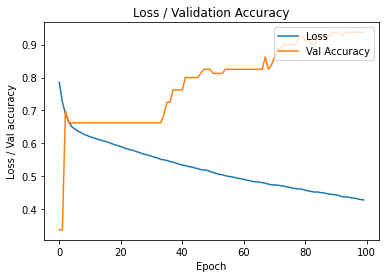

171/171 [==============================] - 0s 60us/step
loss:  0.45216640708042166
accuracy:  0.8538011908531189


In [4]:
# BASE
# loss:  0.6433255146121422
# accuracy:  0.6783625724022848

#######################################################
# Loading Breast Cancer Dataset
#######################################################
from sklearn.datasets import load_breast_cancer # scikit-learn에 포함
from sklearn.model_selection import train_test_split # dataset split 기능
whole_data = load_breast_cancer() # data loading
X_data = whole_data.data # features: x
y_data = whole_data.target # output: y
# training set : test set = 0.7 : 0.3 으로 split
# random_state는 data split의 random seed로 아무 숫자나 줄 수 있다.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

#######################################################
# Generating Model
#######################################################
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout

# model generation using sequential model API
model = Sequential()
# Keras model with two hidden layers with 10 neurons each
# Input layer: input_shape should be explicitly designated
model.add(Dense(10, input_shape = (30,), kernel_initializer='he_normal')) # number of features
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dropout(0.3))
# Output layer => output dimension = 1 since it is binary classification
model.add(Dense(1))
model.add(Activation("sigmoid"))

# model.summary()

from keras import optimizers
sgd = optimizers.SGD(lr = 0.01) # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = "binary_crossentropy", metrics = ["acc"])

#######################################################
# Training Model
#######################################################
history = model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_split = 0.2)

#######################################################
# Plotting
#######################################################
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.title('Loss / Validation Accuracy')
plt.ylabel('Loss / Val accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val Accuracy'], loc='upper right')
plt.show()

#######################################################
# Model Evaluation
#######################################################
results = model.evaluate(X_test, y_test)
print('loss: ', results[0])
print('accuracy: ', results[1])